Processing category: Music


23:44:00 - cmdstanpy - INFO - Chain [1] start processing


Best ARIMA order: (0, 1, 1) with RMSE: 0.76


23:44:01 - cmdstanpy - INFO - Chain [1] done processing


Processing category: Entertainment


23:44:06 - cmdstanpy - INFO - Chain [1] start processing
23:44:06 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (1, 1, 0) with RMSE: 0.15
Processing category: Howto & Style


23:44:10 - cmdstanpy - INFO - Chain [1] start processing
23:44:10 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (0, 1, 0) with RMSE: 0.03
Processing category: Comedy


23:44:13 - cmdstanpy - INFO - Chain [1] start processing
23:44:13 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (0, 0, 0) with RMSE: 0.04
Processing category: Education


23:44:16 - cmdstanpy - INFO - Chain [1] start processing
23:44:16 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (2, 0, 1) with RMSE: 0.01
Processing category: News & Politics


23:44:19 - cmdstanpy - INFO - Chain [1] start processing
23:44:19 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (2, 1, 1) with RMSE: 0.06
Processing category: People & Blogs


23:44:23 - cmdstanpy - INFO - Chain [1] start processing
23:44:23 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (2, 1, 2) with RMSE: 0.06
Processing category: Science & Technology


23:44:26 - cmdstanpy - INFO - Chain [1] start processing
23:44:26 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (0, 0, 0) with RMSE: 0.09
Processing category: Film & Animation


23:44:30 - cmdstanpy - INFO - Chain [1] start processing
23:44:30 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (0, 1, 0) with RMSE: 0.07
Processing category: Sports


23:44:34 - cmdstanpy - INFO - Chain [1] start processing
23:44:34 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (2, 0, 2) with RMSE: 0.03
Processing category: Nonprofits & Activism


23:44:37 - cmdstanpy - INFO - Chain [1] start processing
23:44:37 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (2, 1, 2) with RMSE: 0.00
Processing category: Travel & Events


23:44:40 - cmdstanpy - INFO - Chain [1] start processing
23:44:40 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (0, 1, 2) with RMSE: 0.00
Processing category: Gaming


23:44:43 - cmdstanpy - INFO - Chain [1] start processing
23:44:44 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (0, 1, 2) with RMSE: 0.05
Processing category: Shows


23:44:46 - cmdstanpy - INFO - Chain [1] start processing
23:44:46 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (0, 1, 0) with RMSE: 0.00
Processing category: Autos & Vehicles


23:44:49 - cmdstanpy - INFO - Chain [1] start processing
23:44:49 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (0, 1, 0) with RMSE: 0.00
Processing category: Pets & Animals


23:44:54 - cmdstanpy - INFO - Chain [1] start processing
23:44:54 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (0, 0, 0) with RMSE: 0.02
Processing category: Movies


23:44:57 - cmdstanpy - INFO - Chain [1] start processing
23:44:57 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (0, 1, 2) with RMSE: 0.01
Processing category: Trailers
Best ARIMA order: (0, 1, 0) with RMSE: 0.00
⚠️ Not enough data to train Prophet for category: Trailers
✅ Models trained and saved successfully!


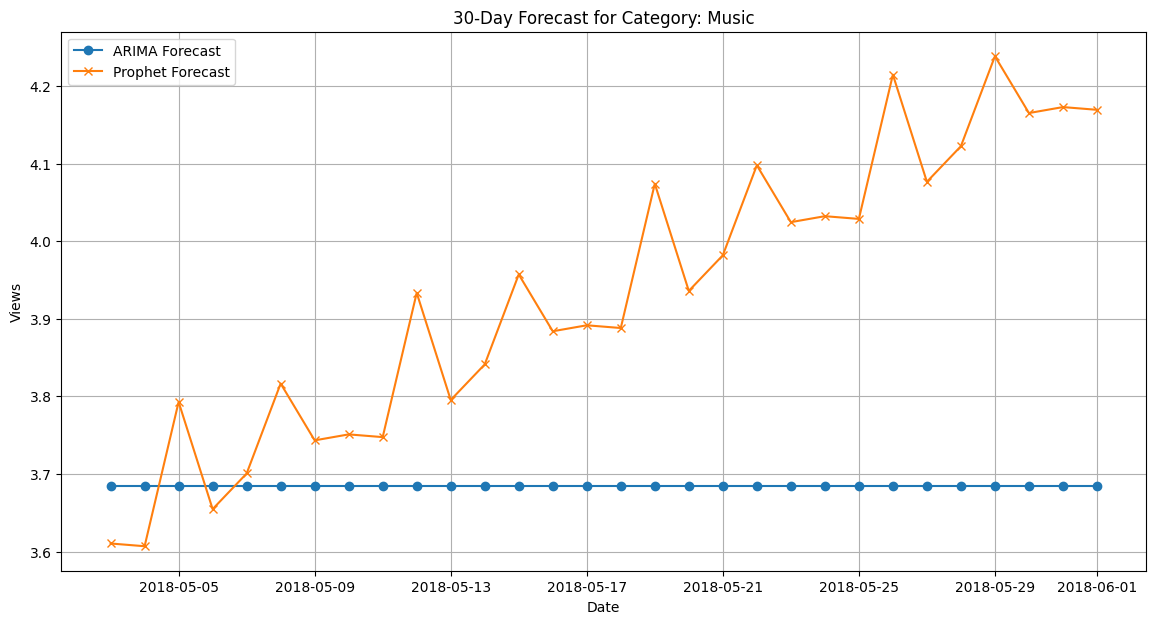

In [4]:
# timeseries_forecasting.ipynb

# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# 2. Load Data
df = pd.read_csv('../data/processed_data.csv')

# 3. Map category_id to readable category names
category_mapping = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
    10: 'Music',
    15: 'Pets & Animals',
    17: 'Sports',
    18: 'Short Movies',
    19: 'Travel & Events',
    20: 'Gaming',
    21: 'Videoblogging',
    22: 'People & Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'Howto & Style',
    27: 'Education',
    28: 'Science & Technology',
    29: 'Nonprofits & Activism',
    30: 'Movies',
    31: 'Anime/Animation',
    32: 'Action/Adventure',
    33: 'Classics',
    34: 'Comedy',
    35: 'Documentary',
    36: 'Drama',
    37: 'Family',
    38: 'Foreign',
    39: 'Horror',
    40: 'Sci-Fi/Fantasy',
    41: 'Thriller',
    42: 'Shorts',
    43: 'Shows',
    44: 'Trailers'
}
df['category'] = df['category_id'].map(category_mapping)

# 4. Fix date column
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df = df.sort_values('trending_date')
df.set_index('trending_date', inplace=True)

# 5. Select features for time series forecasting
categories = df['category'].dropna().unique()  # Drop missing category IDs if any

# 6. Define a function to split train-test sets
def train_test_split_time_series(series, test_size=0.2):
    split_idx = int(len(series) * (1 - test_size))
    train, test = series[:split_idx], series[split_idx:]
    return train, test

# 7. Forecasting using ARIMA and Prophet
final_forecasts = {}

for cat in categories:
    print(f"Processing category: {cat}")
    
    # Subset data for the category
    cat_df = df[df['category'] == cat].resample('D').sum()  # Daily aggregation
    series = cat_df['views'].fillna(0)

    # Train-test split
    train, test = train_test_split_time_series(series)

    # ARIMA modeling
    best_rmse = np.inf
    best_order = None
    best_model = None

    # Simple Grid Search for (p,d,q)
    for p in range(0, 3):
        for d in range(0, 2):
            for q in range(0, 3):
                try:
                    model = ARIMA(train, order=(p, d, q)).fit()
                    pred = model.forecast(steps=len(test))
                    rmse = np.sqrt(mean_squared_error(test, pred))
                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_order = (p, d, q)
                        best_model = model
                except:
                    continue

    print(f"Best ARIMA order: {best_order} with RMSE: {best_rmse:.2f}")

    # Forecast 30 days ahead
    arima_forecast = best_model.forecast(steps=30)

    # Prophet modeling
    prophet_df = train.reset_index()
    prophet_df = prophet_df.rename(columns={'trending_date': 'ds', 'views': 'y'})

    # 🛡️ Check if enough data before fitting Prophet
    if prophet_df['y'].notnull().sum() >= 2:
        prophet_model = Prophet(daily_seasonality=True)
        prophet_model.fit(prophet_df)

        future = prophet_model.make_future_dataframe(periods=30)
        forecast = prophet_model.predict(future)

        prophet_forecast = forecast[['ds', 'yhat']].set_index('ds').iloc[-30:]['yhat']
    else:
        print(f"⚠️ Not enough data to train Prophet for category: {cat}")
        prophet_model = None
        prophet_forecast = None

    # Store both models and forecasts
    final_forecasts[cat] = {
        'arima_forecast': arima_forecast,
        'prophet_forecast': prophet_forecast,
        'arima_model': best_model,
        'prophet_model': prophet_model
    }

# 8. Save the model forecasts
import os
os.makedirs('../models', exist_ok=True)
with open('../models/trend_forecast_model.pkl', 'wb') as f:
    pickle.dump(final_forecasts, f)

print("✅ Models trained and saved successfully!")

# 9. (Optional) Plotting a sample category
sample_cat = categories[0]
arima_pred = final_forecasts[sample_cat]['arima_forecast']
prophet_pred = final_forecasts[sample_cat]['prophet_forecast']

plt.figure(figsize=(14,7))
plt.plot(arima_pred.index, arima_pred.values, label='ARIMA Forecast', marker='o')

if prophet_pred is not None:
    plt.plot(prophet_pred.index, prophet_pred.values, label='Prophet Forecast', marker='x')
else:
    print(f"⚠️ Prophet forecast not available for category: {sample_cat}")

plt.title(f"30-Day Forecast for Category: {sample_cat}")
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend()
plt.grid()
plt.show()


In [2]:
print(df.columns)


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'publish_day', 'publish_month', 'publish_hour',
       'category_id_encoded'],
      dtype='object')
